<a href="https://colab.research.google.com/github/Roms-tripleten/everpeak_da_82/blob/main/Analisis_de_relaci%C3%B3n_entre_CO_y_PM2_5_para_GTO_01_25_Uso_de_OpenAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos: Extracción de datos desde un API REST 🌐📊

## Objetivos
- Entender qué es un **API** y por qué es una fuente común de datos reales.
- Conocer cómo funcionan las **llamadas HTTP**.
- Aprender la estructura básica de llamadas **GET** y **POST** usando `requests` en Python.
- Sentar las bases para usar APIs como fuente de datos en proyectos de análisis.

---

## Qué es un API
Un **API (Application Programming Interface)** es una interfaz que permite que dos sistemas se comuniquen entre sí.  
Desde el punto de vista de análisis de datos, un API es una **fuente externa de datos** a la que accedemos bajo reglas claras: qué pedir, cómo pedirlo y qué formato recibimos.

> 🧠 Piensa en un API como un *mesero*: tú haces el pedido (request), la cocina procesa la solicitud y te entrega exactamente lo que pediste (response).

Los APIs REST suelen devolver datos en formatos como **JSON**, ideales para ser consumidos por Python.

---

### Llamadas HTTP (GET, POST)
Las **llamadas HTTP** son la forma estándar de comunicarnos con un API. Cada llamada indica **qué queremos hacer**.

- **GET** 👉 Obtener información  
- **POST** 👉 Enviar información  
- (Existen otras como PUT, DELETE, pero nos enfocaremos en las más comunes)

> 📌 En análisis de datos, **GET es la más utilizada**, porque normalmente queremos *leer datos*, no modificarlos.

---

### Diferencia entre un API y una base de datos
Aunque ambos permiten acceder a datos, **no son lo mismo**:

- **Base de datos (SQL)**  
  - Acceso directo a tablas
  - Tú defines la consulta (`SELECT`, `JOIN`, `WHERE`)
  - Control total del esquema
  - Normalmente datos internos de una empresa

- **API**  
  - Acceso indirecto a datos
  - El proveedor define qué puedes pedir
  - No ves las tablas internas
  - Ideal para datos externos o en tiempo real

> 🔑 Un analista **no controla el API**, solo aprende a consumirlo correctamente.

---

### Llamadas a API en Python usando `requests`
En Python, la librería más común para trabajar con APIs es **`requests`**.  
Nos permite construir fácilmente llamadas HTTP y manejar las respuestas.

Una llamada a un API suele componerse de:
- **URL (endpoint)**
- **Parámetros (`params`)**
- **Headers**
- *(opcional)* Body (en POST)

Los **headers** son metadatos que acompañan la solicitud HTTP.  
Le dicen al servidor **quién eres**, **qué tipo de datos esperas** y **cómo debe procesarse la solicitud**.

Headers comunes en APIs:
- `Authorization` o `X-API-Key` → autenticación
- `Content-Type` → formato de datos enviados
- `Accept` → formato de datos esperados en la respuesta


---

#### Estructura de una llamada GET en `requests`
Una llamada **GET** se usa para **obtener datos** desde un API.

```python
import requests

url = "https://api.ejemplo.com/data"

params = {
    "limit": 100,
    "country": "MX"
}

response = requests.get(url, params=params)

response.status_code
```

Elementos clave:
- **url**: endpoint del API
- **params**: parámetros de consulta (query params)
- **response**: objeto con la respuesta del servidor

Para trabajar con los datos:
```python
data = response.json()
data
```

---

#### Estructura de una llamada POST en `requests`
Una llamada **POST** se usa para **enviar datos** al API (crear o procesar información).

```python
import requests

url = "https://api.ejemplo.com/data"

payload = {
    "name": "Roman",
    "role": "Data Analyst"
}

response = requests.post(url, json=payload)

response.status_code
```

Elementos clave:
- **json / data**: información que se envía al servidor
- **POST** modifica o crea recursos
- Menos común en análisis, más común en sistemas transaccionales

> ⚠️ En proyectos de análisis, normalmente **NO usamos POST**, pero es importante conocerlo para entender la lógica de los APIs.




## Ejemplo práctico: OpenAQ API – Acceso a datos ambientales 🌍🌫️

[OpenAQ](https://explore.openaq.org/) es una plataforma abierta que recopila y estandariza datos de **calidad del aire** provenientes de estaciones oficiales alrededor del mundo.  
Su API permite acceder a mediciones reales de contaminantes como **PM2.5, PM10, NO₂, O₃, CO**, entre otros, junto con información temporal y geográfica, lo que la convierte en una fuente ideal para análisis ambientales, series de tiempo y estudios comparativos entre ciudades o países.

> 🧠 OpenAQ no genera datos: **agrega y normaliza** información de múltiples proveedores oficiales para facilitar su análisis.

---

### Acceso a la API
Para consumir datos desde la **API v3 de OpenAQ** es necesario contar con un **API Key**, que se utiliza para autenticar cada solicitud.

El proceso es el siguiente:
1. Registrarse en la plataforma de OpenAQ Explorer.
2. Crear una cuenta de usuario.
3. Generar un **API Key** desde el panel de configuración.
4. Usar ese API Key en los **headers** de cada request.

> 🔐 El API Key funciona como una credencial personal.  
> No debe compartirse ni subirse a repositorios públicos.

En la práctica, el API Key se envía en el header `X-API-Key` y se recomienda almacenarlo como **variable de entorno**, especialmente cuando se trabaja con notebooks que luego se publicarán en GitHub.

Este paso habilita el acceso a endpoints como:
- Listado de países y ubicaciones
- Sensores de medición
- Mediciones crudas o agregadas (diarias)
- Series temporales ambientales reales

> Puedes consultar la informacion sobre el acceso al API y ejemplos en su [documentación](https://docs.openaq.org/about/about)

En las siguientes secciones utilizaremos este acceso para **extraer, transformar y analizar** datos ambientales reales usando Python. En especifico analizaremos el comportamiento de dos contaminantes $CO$ y $PM_{2.5}$


- **PM2.5 (material particulado fino)**: está compuesto por partículas microscópicas que pueden penetrar profundamente en los pulmones e incluso ingresar al torrente sanguíneo. Es uno de los contaminantes con mayor impacto en la salud, asociado a enfermedades respiratorias y cardiovasculares, por lo que se considera un **indicador crítico de calidad del aire** en estudios ambientales.

- **CO (monóxido de carbono)**: es un gas producto de la combustión incompleta, especialmente del tráfico vehicular. Aunque en concentraciones ambientales suele ser menos letal que otros contaminantes, es un **buen proxy de emisiones por combustión**, lo que lo hace muy relevante para analizar patrones urbanos y su relación con otros contaminante


In [ ]:
import requests
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
API_KEY="INGRESA TU API-KEY"

**Obtener el listado de paises**

In [ ]:
# Endpoint v3 Countries
url = "https://api.openaq.org/v3/countries"


headers = {
    "X-API-Key": API_KEY
}

params={'limit':1000}
response = requests.get(url, headers=headers,params=params)
response.raise_for_status()

data = response.json()



In [ ]:
countries=pd.DataFrame(data['results'])

In [ ]:
countries

,id,code,name,datetimeFirst,datetimeLast,parameters
0,1,ID,Indonesia,2016-01-30T01:00:00Z,2026-02-06T00:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."
1,2,MY,Malaysia,2022-11-03T21:00:00Z,2026-02-06T00:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."
2,3,CL,Chile,2016-01-30T01:00:00Z,2026-02-06T00:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."
3,5,PE,Peru,2016-03-04T17:00:00Z,2026-02-06T00:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."
4,6,AR,Argentina,2016-01-01T03:00:00Z,2026-02-06T03:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."
...,...,...,...,...,...,...
139,224,JE,Jersey,2024-04-24T16:00:00Z,2026-02-05T22:06:17.993000Z,"[{'id': 2, 'name': 'pm25', 'units': 'µg/m³', '..."
140,231,SG,Singapore,2016-04-05T09:00:00Z,2026-02-06T00:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."
141,239,MV,Maldives,2024-09-08T19:00:00Z,2026-02-06T00:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."
142,248,GU,Guam,2023-08-13T02:00:00Z,2026-02-06T00:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."


In [ ]:
countries.query('code == "MX"')

,id,code,name,datetimeFirst,datetimeLast,parameters
120,157,MX,Mexico,2016-03-06T20:00:00Z,2026-02-06T00:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."


In [ ]:
# Endpoint v3 Countries
url = "https://api.openaq.org/v3/countries/157"


headers = {
    "X-API-Key": API_KEY
}

params={'limit':100000}
response = requests.get(url, headers=headers)
response.raise_for_status()

data = response.json()



In [ ]:
pd.DataFrame(data['results'])

,id,code,name,datetimeFirst,datetimeLast,parameters
0,157,MX,Mexico,2016-03-06T20:00:00Z,2026-02-06T00:00:00Z,"[{'id': 1, 'name': 'pm10', 'units': 'µg/m³', '..."


**Obtener localidades de México**

In [ ]:
# Get locations

url = "https://api.openaq.org/v3/locations"


headers = {
    "X-API-Key": API_KEY
}

params={'limit':1000,'countries_id':[157]}
response = requests.get(url, headers=headers,params=params)
response.raise_for_status()

data = response.json()



In [ ]:
pd.DataFrame(data['results']).head()

,id,name,locality,timezone,country,owner,provider,isMobile,isMonitor,instruments,sensors,coordinates,licenses,bounds,distance,datetimeFirst,datetimeLast
0,309,Obispado,None,America/Monterrey,"{'id': 157, 'code': 'MX', 'name': 'Mexico'}","{'id': 4, 'name': 'Unknown Governmental Organi...","{'id': 119, 'name': 'AirNow'}",False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 522, 'name': 'o3 ppm', 'parameter': {'...","{'latitude': 25.67555, 'longitude': -100.33833}","[{'id': 33, 'name': 'US Public Domain', 'attri...","[-100.33833, 25.67555, -100.33833, 25.67555]",None,"{'utc': '2016-03-07T15:00:00Z', 'local': '2016...","{'utc': '2016-11-03T20:00:00Z', 'local': '2016..."
1,338,Estaci�n Hospital Ge,GUANAJUATO,America/Mexico_City,"{'id': 157, 'code': 'MX', 'name': 'Mexico'}","{'id': 4, 'name': 'Unknown Governmental Organi...","{'id': 119, 'name': 'AirNow'}",False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 3761, 'name': 'co ppm', 'parameter': {...","{'latitude': 20.9479, 'longitude': -101.4258}","[{'id': 33, 'name': 'US Public Domain', 'attri...","[-101.4258, 20.9479, -101.4258, 20.9479]",None,"{'utc': '2016-03-06T20:00:00Z', 'local': '2016...","{'utc': '2025-03-29T12:00:00Z', 'local': '2025..."
2,348,Santa Fe,DISTRITO FEDERAL,America/Mexico_City,"{'id': 157, 'code': 'MX', 'name': 'Mexico'}","{'id': 4, 'name': 'Unknown Governmental Organi...","{'id': 119, 'name': 'AirNow'}",False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 5079225, 'name': 'co ppm', 'parameter'...","{'latitude': 19.3573, 'longitude': -99.2627999...","[{'id': 33, 'name': 'US Public Domain', 'attri...","[-99.26279999999998, 19.3573, -99.262799999999...",None,"{'utc': '2022-10-04T18:00:00Z', 'local': '2022...","{'utc': '2022-10-04T19:00:00Z', 'local': '2022..."
3,359,Estaci�n Bomberos,GUANAJUATO,America/Mexico_City,"{'id': 157, 'code': 'MX', 'name': 'Mexico'}","{'id': 4, 'name': 'Unknown Governmental Organi...","{'id': 119, 'name': 'AirNow'}",False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 3783, 'name': 'o3 ppm', 'parameter': {...","{'latitude': 20.67495, 'longitude': -101.35595}","[{'id': 33, 'name': 'US Public Domain', 'attri...","[-101.35595, 20.67495, -101.35595, 20.67495]",None,"{'utc': '2016-03-06T21:00:00Z', 'local': '2016...","{'utc': '2025-03-29T12:00:00Z', 'local': '2025..."
4,376,Estaci�n Nativitas,GUANAJUATO,America/Mexico_City,"{'id': 157, 'code': 'MX', 'name': 'Mexico'}","{'id': 4, 'name': 'Unknown Governmental Organi...","{'id': 119, 'name': 'AirNow'}",False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 656, 'name': 'co ppm', 'parameter': {'...","{'latitude': 20.565228, 'longitude': -101.18824}","[{'id': 33, 'name': 'US Public Domain', 'attri...","[-101.18824, 20.565228, -101.18824, 20.565228]",None,"{'utc': '2016-03-06T20:00:00Z', 'local': '2016...","{'utc': '2025-03-29T12:00:00Z', 'local': '2025..."


In [ ]:
locations_sensors=pd.DataFrame(data['results'])
locations_sensors=locations_sensors.explode('sensors')
sensor_data=pd.json_normalize(locations_sensors['sensors']).reset_index(drop=True)
locations_sensors=locations_sensors[['id','name','locality']].reset_index(drop=True)
locations_sensors.rename(columns={'id':'id_location','name':'name_location'},inplace=True)
locations_sensors = pd.concat([locations_sensors,sensor_data],axis=1)
locations_sensors

,id_location,name_location,locality,id,name,parameter.id,parameter.name,parameter.units,parameter.displayName
0,309,Obispado,None,522,o3 ppm,10,o3,ppm,O₃
1,309,Obispado,None,1027,pm10 µg/m³,1,pm10,µg/m³,PM10
2,338,Estaci�n Hospital Ge,GUANAJUATO,3761,co ppm,8,co,ppm,CO
3,338,Estaci�n Hospital Ge,GUANAJUATO,3760,o3 ppm,10,o3,ppm,O₃
4,338,Estaci�n Hospital Ge,GUANAJUATO,3756,pm10 µg/m³,1,pm10,µg/m³,PM10
...,...,...,...,...,...,...,...,...,...
1716,6216831,Instituto Tecnológico de Pachuca,Pachuca de Soto,15283119,nox ppm,19840,nox,ppm,NOx
1717,6216831,Instituto Tecnológico de Pachuca,Pachuca de Soto,15275450,o3 ppm,10,o3,ppm,O₃
1718,6216831,Instituto Tecnológico de Pachuca,Pachuca de Soto,15275453,pm10 µg/m³,1,pm10,µg/m³,PM10
1719,6216831,Instituto Tecnológico de Pachuca,Pachuca de Soto,15275449,pm25 µg/m³,2,pm25,µg/m³,PM2.5


In [ ]:
locations_sensors.query('locality == "GUANAJUATO" and name == "pm25 µg/m³"')

,id_location,name_location,locality,id,name,parameter.id,parameter.name,parameter.units,parameter.displayName
5,338,Estaci�n Hospital Ge,GUANAJUATO,581,pm25 µg/m³,2,pm25,µg/m³,PM2.5
15,359,Estaci�n Bomberos,GUANAJUATO,615,pm25 µg/m³,2,pm25,µg/m³,PM2.5
24,413,Estaci�n Te�dula,GUANAJUATO,5079213,pm25 µg/m³,2,pm25,µg/m³,PM2.5
72,676,Estaci�n CICEG,GUANAJUATO,1926298,pm25 µg/m³,2,pm25,µg/m³,PM2.5
81,684,Estaci�n Seguridad P,GUANAJUATO,1175,pm25 µg/m³,2,pm25,µg/m³,PM2.5
226,2094,Estaci�n San Juanico,GUANAJUATO,3748,pm25 µg/m³,2,pm25,µg/m³,PM2.5
231,2097,Estaci�n Facultad de,GUANAJUATO,3762,pm25 µg/m³,2,pm25,µg/m³,PM2.5
236,2098,Estaci�n DIF,GUANAJUATO,3767,pm25 µg/m³,2,pm25,µg/m³,PM2.5
252,6368,Estaci�n Guanajuato,GUANAJUATO,17827,pm25 µg/m³,2,pm25,µg/m³,PM2.5
254,6919,Estaci�n San Luis de,GUANAJUATO,19866,pm25 µg/m³,2,pm25,µg/m³,PM2.5


**Obtener mediciones de CO en Guanajuato para Enero 2025**

In [ ]:
ids_selection=locations_sensors.query('locality == "GUANAJUATO" and name == "co ppm"')['id'].to_list()

In [ ]:
ids_selection

[3761, 656, 5079214, 1161, 3742, 3746, 3752, 3766, 3771]

In [ ]:
SENSOR_ID = 3761  # ← reemplaza por el sensor real

url = f"https://api.openaq.org/v3/sensors/{SENSOR_ID}/measurements/daily"

params = {
    "datetime_from": "2025-01-01T00:00:00Z",
    "datetime_to": "2025-01-31T23:59:59Z",
    "limit": 31
}

headers = {
    "X-API-Key": API_KEY
}

response = requests.get(url, headers=headers, params=params)
response.raise_for_status()

data = response.json()['results']

df = pd.json_normalize(data)
df.head()

,value,coordinates,flagInfo.hasFlags,parameter.id,parameter.name,parameter.units,parameter.displayName,period.label,period.interval,period.datetimeFrom.utc,...,coverage.expectedCount,coverage.expectedInterval,coverage.observedCount,coverage.observedInterval,coverage.percentComplete,coverage.percentCoverage,coverage.datetimeFrom.utc,coverage.datetimeFrom.local,coverage.datetimeTo.utc,coverage.datetimeTo.local
0,2.30,None,False,8,co,ppm,None,1 day,24:00:00,2025-01-01T06:00:00Z,...,24,24:00:00,1,01:00:00,4.0,4.0,2025-01-02T05:00:00Z,2025-01-01T23:00:00-06:00,2025-01-02T06:00:00Z,2025-01-02T00:00:00-06:00
1,2.30,None,False,8,co,ppm,None,1 day,24:00:00,2025-01-02T06:00:00Z,...,24,24:00:00,24,24:00:00,100.0,100.0,2025-01-02T06:00:00Z,2025-01-02T00:00:00-06:00,2025-01-03T06:00:00Z,2025-01-03T00:00:00-06:00
2,2.25,None,False,8,co,ppm,None,1 day,24:00:00,2025-01-03T06:00:00Z,...,24,24:00:00,24,24:00:00,100.0,100.0,2025-01-03T06:00:00Z,2025-01-03T00:00:00-06:00,2025-01-04T06:00:00Z,2025-01-04T00:00:00-06:00
3,2.34,None,False,8,co,ppm,None,1 day,24:00:00,2025-01-04T06:00:00Z,...,24,24:00:00,24,24:00:00,100.0,100.0,2025-01-04T06:00:00Z,2025-01-04T00:00:00-06:00,2025-01-05T06:00:00Z,2025-01-05T00:00:00-06:00
4,2.66,None,False,8,co,ppm,None,1 day,24:00:00,2025-01-05T06:00:00Z,...,24,24:00:00,24,24:00:00,100.0,100.0,2025-01-05T06:00:00Z,2025-01-05T00:00:00-06:00,2025-01-06T06:00:00Z,2025-01-06T00:00:00-06:00


In [ ]:
co_df=pd.DataFrame()
for sensor_id in ids_selection:
    print(f"Sensor {sensor_id}", end=' ')
    try:

        url = f"https://api.openaq.org/v3/sensors/{sensor_id}/measurements/daily"

        params = {
            "datetime_from": "2025-01-01T00:00:00Z",
            "datetime_to": "2025-01-31T23:59:59Z",
            "limit": 31
        }

        headers = {
            "X-API-Key": API_KEY
        }

        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()

        data = response.json()['results']

        df = pd.json_normalize(data)
        df['sensor_id'] =sensor_id
        df['date_at']=pd.to_datetime(df['period.datetimeFrom.local']).dt.date
        df.rename(columns={'parameter.name':'parameter'},inplace=True)
        co_df=pd.concat([co_df,df[['date_at','sensor_id','parameter','value']]])
        time.sleep(0.5)
        print("Success")
    except Exception as ee:
        print("Failed")
        print (ee)
        pass

Sensor 3761 Success
Sensor 656 Success
Sensor 5079214 Success
Sensor 1161 Success
Sensor 3742 Success
Sensor 3746 Success
Sensor 3752 Success
Sensor 3766 Failed
'period.datetimeFrom.local'
Sensor 3771 Success


In [ ]:
co_df

,date_at,sensor_id,parameter,value
0,2025-01-01,3761,co,2.300
1,2025-01-02,3761,co,2.300
2,2025-01-03,3761,co,2.250
3,2025-01-04,3761,co,2.340
4,2025-01-05,3761,co,2.660
...,...,...,...,...
26,2025-01-27,3771,co,1.270
27,2025-01-28,3771,co,0.963
28,2025-01-29,3771,co,0.838
29,2025-01-30,3771,co,0.725


*Analisis exploratorio*

In [ ]:
co_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 30
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_at    244 non-null    object 
 1   sensor_id  244 non-null    int64  
 2   parameter  244 non-null    object 
 3   value      244 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.6+ KB


In [ ]:
co_df.describe()


,sensor_id,value
count,2.440000e+02,244.000000
mean,6.479109e+05,1.528283
std,1.694004e+06,0.893024
min,6.560000e+02,0.400000
25%,3.742000e+03,0.599000
50%,3.752000e+03,1.365000
75%,3.771000e+03,2.145000
max,5.079214e+06,6.060000


Text(0.5, 1.0, 'Variabilidad por sensor')

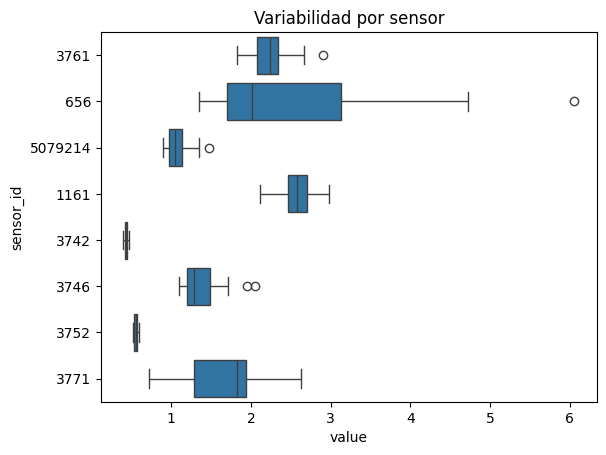

In [ ]:
co_df['sensor_id']=co_df['sensor_id'].astype(str)
sns.boxplot(data=co_df,x='value',y='sensor_id')
plt.title('Variabilidad por sensor')

In [ ]:
co_df_daily=co_df.groupby('date_at')['value'].mean()

In [ ]:
co_df_daily

,value
date_at,
2025-01-01,1.387500
2025-01-02,1.418500
2025-01-03,1.336000
2025-01-04,1.438250
2025-01-05,1.520500
2025-01-06,1.773125
2025-01-07,1.527250
2025-01-08,1.469750
2025-01-09,1.393000


<Axes: title={'center': 'Concentración de CO (GT) en el tiempo'}, xlabel='date_at'>

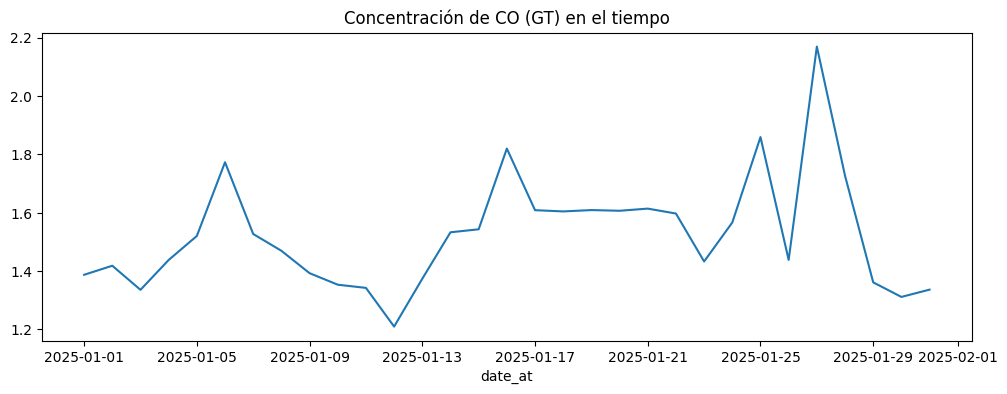

In [ ]:
co_df_daily.plot(figsize=(12,4), title="Concentración de CO (GT) en el tiempo")

**Obtener mediciones de PM25 en Guanajuato para Enero 2025**

In [ ]:
ids_selection=locations_sensors.query('locality == "GUANAJUATO" and name == "pm25 µg/m³"')['id'].to_list()

pm_df=pd.DataFrame()
for sensor_id in ids_selection:
    print(f"Sensor {sensor_id}", end=' ')
    try:

        url = f"https://api.openaq.org/v3/sensors/{sensor_id}/measurements/daily"

        params = {
            "datetime_from": "2025-01-01T00:00:00Z",
            "datetime_to": "2025-01-31T23:59:59Z",
            "limit": 31
        }

        headers = {
            "X-API-Key": API_KEY
        }

        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()

        data = response.json()['results']

        df = pd.json_normalize(data)
        df['sensor_id'] =sensor_id
        df['date_at']=pd.to_datetime(df['period.datetimeFrom.local']).dt.date
        df.rename(columns={'parameter.name':'parameter'},inplace=True)
        pm_df=pd.concat([pm_df,df[['date_at','sensor_id','parameter','value']]])
        time.sleep(0.5)
        print("Success")
    except Exception as ee:
        print("Failed")
        print (ee)
        pass

Sensor 581 Success
Sensor 615 Success
Sensor 5079213 Success
Sensor 1926298 Success
Sensor 1175 Success
Sensor 3748 Failed
'period.datetimeFrom.local'
Sensor 3762 Failed
'period.datetimeFrom.local'
Sensor 3767 Success
Sensor 17827 Success
Sensor 19866 Success


In [ ]:
pm_df.head()

,date_at,sensor_id,parameter,value
0,2025-01-01,581,pm25,26.3
1,2025-01-02,581,pm25,23.6
2,2025-01-03,581,pm25,18.9
3,2025-01-04,581,pm25,23.0
4,2025-01-05,581,pm25,28.4


In [ ]:
pm_df.describe()

,sensor_id,value
count,2.280000e+02,228.000000
mean,7.894897e+05,19.108465
std,1.754138e+06,8.038766
min,5.810000e+02,3.950000
25%,6.150000e+02,14.000000
50%,3.767000e+03,18.350000
75%,1.986600e+04,22.825000
max,5.079213e+06,77.200000


Text(0.5, 1.0, 'Variabilidad por sensor')

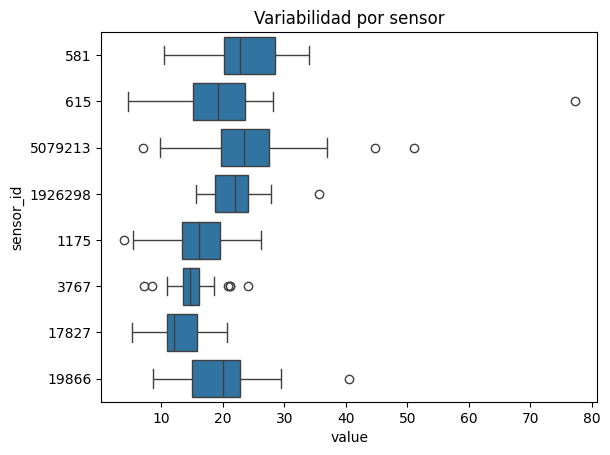

In [ ]:
pm_df['sensor_id']=pm_df['sensor_id'].astype(str)
sns.boxplot(data=pm_df,x='value',y='sensor_id')
plt.title('Variabilidad por sensor')

In [ ]:
pm_df_daily=pm_df.groupby('date_at')['value'].mean()

<Axes: title={'center': 'Concentración de PM25 (GT) en el tiempo'}, xlabel='date_at'>

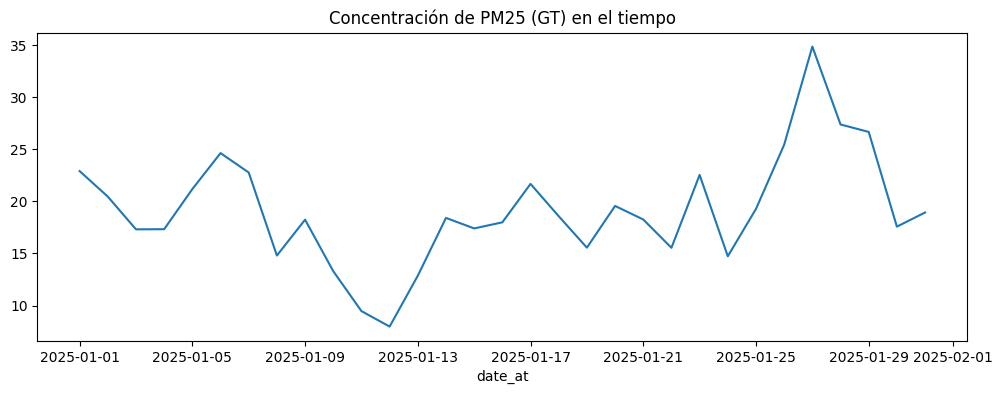

In [ ]:
pm_df_daily.plot(figsize=(12,4), title="Concentración de PM25 (GT) en el tiempo")

**Analisis de correlación**

In [ ]:
df_daily=pm_df_daily.reset_index(name='pm25').merge(co_df_daily.reset_index(name='co'))

In [ ]:
df_daily

In [ ]:
df_daily[["pm25", "co"]].corr()

,pm25,co
pm25,1.00000,0.56553
co,0.56553,1.00000


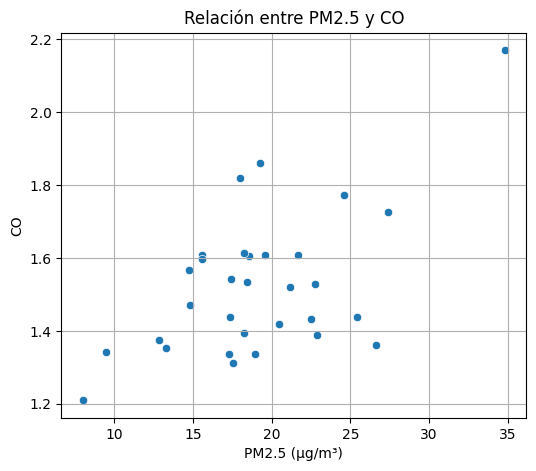

In [ ]:
plt.figure(figsize=(6,5))

sns.scatterplot(
    data=df_daily,
    x="pm25",
    y="co"
)

plt.title("Relación entre PM2.5 y CO")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("CO")
plt.grid(True)
plt.show()

### Conclusiones

*Escribe aqui tus conclusiones*


### Compartir resultados

**Instrucciones**

*Carga tu reporte en GitHub, incluye en el repositorio un archivo README donde describas el objetivo del estudio*

## 🚀 Para seguir aprendiendo :

---

- 📚 Vuelve a revisar este notebook y trata resolver por tu cuenta  nuevamente
- 💬 Recuerda que en Discord puedes dejar todos tus comentarios y dudas sobre el contenido del sprint en [`Discord`](https://discord.com/channels/1081207584104656986/1420849538196836472).
    - 📝 Si tienes preguntas sobre tu proyecto, usa el canal [`#project`](https://discord.com/channels/1081207584104656986/1420848813186351134) para recibir ayuda y compartir ideas.
    - 🤝 Aprovecha el espacio de `CoLearning` para aclarar tus dudas junto con otros estudiantes e instructores: [Co-Learning](https://discord.com/channels/1081207584104656986/1197953851391746119).
    - En tus preguntas recuerda etiquetar a `@Dataconsulta` y ubica tu pregunta de acuerdo a `Sprint/Capitulo/Seccion`
- 📅 ¿Necesitas ayuda personalizada? Puedes agendar una sesión `1:1` conmigo aquí: [1:1 Roman Castillo](https://scheduler.zoom.us/roman-castillo/1-1-roman-castillo).

- Por último hazme paro y responde la encuesta al final de la sesión, me sirve para poder ayudarte mejor

¡Sigue practicando y no dudes en pedir apoyo cuando lo necesites! 💪✨